# Gjennomsnittlig vekstfart, momentan vekstfart og numerisk derivasjon i Python

Den deriverte av en funksjon $f$ for et tidspunkt $t$ gir oss "farten" til funksjonen i det tidspunktet. Hva betyr det egentlig? Og hvordan finner vi farten?

La oss se på et eksempel. La oss si at vi lurer på hvor raskt jeg løper? Hvordan kan vi gå frem?


<img src="bilder/athletes-running-on-track-and-field-oval-in-grayscale-34514.jpg" width="600px">


## Gjennomsnittsfart er strekningen jeg løpte delt på tiden det tok



<img src="bilder/fart_illustrasjon.png">


Kanskje har du allerede målt fart før og har en ide om hvordan det skal gjøres: Vi tar fram stoppeklokka og målebåndet. Så måler vi lengden på strekningen jeg løper og hvor lang tid jeg bruker. Gjennomsnittsfarten min er da strekningen delt på tid. For å regne ut dette kan vi skrive et lite program:

In [65]:
startposisjon = 0  #m unna huset mitt
sluttposisjon = 30  #m unna huset mitt

starttid = 0  #s siden start
slutttid = 6  #s siden start

ds = sluttposisjon - startposisjon
dt = slutttid - starttid

fart = ds/dt
print(f'Farten er {fart} m/s')

Farten er 5.0 m/s


I programmet over kan du nå putte inn hvilken som helst startposisjon, sluttposisjon, starttid og sluttid og få ut gjennomsnittfarten

## Oppgave 1
**Hvis vi vil vite hvordan farten endrer seg underveis trenger vi flere målepunkter**

Men hva om vi ikke nøyer oss med gjennomsnittfarten. Hva om vi vil vite hva farten min er underveis i løpeturen? Hva gjør vi da?

Da må vi rett og slett ta flere mål. La oss si at jeg løper i tyve sekunder og noen står med stoppeklokke og måler hvor langt jeg har løpt for vært sekund. For å lagre måletidspunktene i python kan i bruke arange i numpy. 

In [66]:
# kanskje ferdig kode hvor oppgaven er å skrive ned hva ver linje gjør
from pylab import *
from ipywidgets import interact

måletidspunkt = arange(0, 21, 1)
print(måletidspunkt)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


### Oppgave 1 a) Tolke kode
Se på koden i cella over og svar på følgende spørsmål:
* Hva gjør hver linje?
* Hva slags effekt har tallene 0, 21 og 1 på koden? Hva vil skje dersom du endrer dem?

Vi trenger også avstanden min på de ulike tidspunktene. La oss si at avstanden jeg har løpt er gitt ved funksjonen
$$ f(t) =\frac{1}{1 + e^{10 - t}}. $$

### Oppgave 1 b) Funksjon for avstand
Lag en funksjon `f(t)` som tar inn et tidspunkt og returnerer avstand gitt av uttrykket over (hint for å regne ut $e^x$ kan du bruke `exp(x)` funksjonen fra `pylab`).

In [67]:
# Fyll inn funksjonen her
def f(t):
    return 1. / (1. + exp(-t+10))

### Oppgave 1c) Finne avstandene på måletidspunktene 
Bruk funksjonen over til å finne måletidspunktene 

In [68]:
# Fyll inn koden 
måledistanser = f(måletidspunkt)
print(måledistanser)

[4.53978687e-05 1.23394576e-04 3.35350130e-04 9.11051194e-04
 2.47262316e-03 6.69285092e-03 1.79862100e-02 4.74258732e-02
 1.19202922e-01 2.68941421e-01 5.00000000e-01 7.31058579e-01
 8.80797078e-01 9.52574127e-01 9.82013790e-01 9.93307149e-01
 9.97527377e-01 9.99088949e-01 9.99664650e-01 9.99876605e-01
 9.99954602e-01]


Nå kan vi plotte løpeturen min med plot funksjonen

### Oppgave 1d) Plotte avstandsmålinene mot tidsmålingene

Bruk funksjonene `plot`, `title`, `xlabel`, `ylabel` og `show` til å lage et plott med følgende egenskaper:
* måletidspunkt på x-aksen og måledistanser på y-aksen
* tittelen "løpetur"
* merkelappen "Tid" på x-aksen
* merkelappen "Distanse" på y-aksen



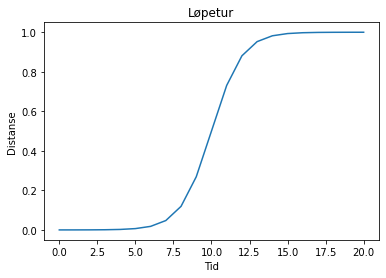

In [69]:
# Din kode her
plot(måletidspunkt, måledistanser)

title('Løpetur')
xlabel('Tid')
ylabel('Distanse')
show()

### Oppgave 1e) Refleksjonsoppgave
Når løpte jeg raskest? Etter 0 sekunder, etter 10 sekunder eller etter 15?

# Del 2: Hva er farten min underveis i turen?

<img src="bilder/stoppeklokker.png" width="600px">


Vi starter med å velge et punkt vi vil finne tiden på, for eksempel $t = 10$s. La oss starte med å vise frem dette punktet med en prikk.

##  Fart er et mål på endring, så vi trenger to tidspunkt

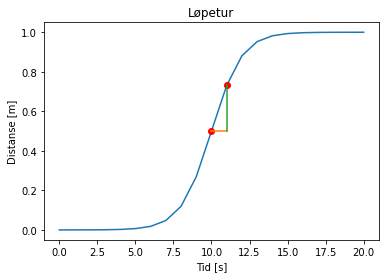

In [70]:
plot(måletidspunkt, måledistanser)

plot(10, f(10), 'ro') # plott punkt
plot(11, f(11), 'ro') # plott punkt
plot([10, 11], [f(10), f(10)]) # plott endring i tid
plot([11, 11], [f(10), f(11)]) # plott endring i strekning

title('Løpetur')
xlabel('Tid [s]')
ylabel('Distanse [m]')
show()

Farten er endringen i strekning delt på endringen i tid. Vi kan se av plottet vårt at endringen i strekning er ganske stor mellom disse tidspunktene. 

Vi kan nå regne ut farten slik vi har gjorde tidligere:

In [71]:
fart = (f(11)-f(10))/(11-10)
print(f'Farten er {fart} m/s')

Farten er 0.2310585786300049 m/s


Hvis vi vil undersøke hvordan farten min endrer seg for forskjellige tidspunkt, må vi gjøre koden vår mer generell. Vi trenger variabler for tidspunktet vi vil se på og for hvor ofte vi måler. La oss kalle dem `t` og `dt`.

Fart: 0.14973849934787742 m/s


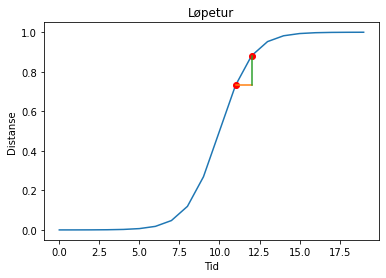

In [72]:
t = 11  # Tidspunktet vi ser på
dt = 1  # Hvor stor er endringen i tid?

måletidspunkt = arange(0, 20, dt)
måledistanser = f(måletidspunkt)
plot(måletidspunkt, måledistanser)

plot(t, f(t), 'ro')
plot(t+dt, f(t+dt), 'ro')

# Plotte endring i tid
plot((t, t+dt), (f(t), f(t)))

# Plotte endring i strekning
plot((t+dt, t+dt), (f(t), f(t+dt)))
ds = f(t+dt) - f(t)

fart = ds/dt
print(f'Fart: {fart} m/s')

# Pynte plottet med merkelapper og tittel
title('Løpetur')
xlabel('Tid')
ylabel('Distanse')

# Hvis frem plottet
show()

## Oppgave 2

### Oppgave 2a)
Kjør cellen over med forskjellige verdier av måletidspunkt. Hvordan endrer farten seg gjennom løpeturen? Hva er farten etter 2 sekunder? Hva med etter 15 sekunder?

### Oppgave 2b)

Lag en funksjon `plot_derivasjon(t)` som tar inn tidspunktet vi vil derivere funksjonen i, plotter funksjonen med en trekant som visualiserer den deriverte og printer ut den estimerte hastigheten i det gitte tidspunktet. (**Hint:** Ta utgangspunkt i koden over når du lager funksjonen).

In [73]:
def plot_derivasjon(t):
    # Gjøre beregninger
    dt = 1
    måletidspunkt = arange(0, 21, dt)
    måledistanser = f(måletidspunkt)

    # Tegne linjene
    plot(måletidspunkt, måledistanser)

    plot((t, t + dt), (f(t), f(t))) # plott endring i tid
    plot((t + dt, t + dt), (f(t), f(t+dt))) # plott endring i strekning

    # Pynte på plottet
    title('Løpetur')
    xlabel('Tid')
    ylabel('Distanse')
    
    # Regne ut farten
    avstands_endring = f(t+dt)-f(t)
    fart = (avstands_endring/(dt))
    print(f'Farten er {fart} m/s')

### Oppgave 2c)

Bruk `interact`-funksjonen til å knytte `plot_derivasjon`-funksjonen opp mot en glidebryter som lar brukeren velge `t`-variabelen.

In [74]:
interact(plot_derivasjon, t=(0,20))

interactive(children=(IntSlider(value=10, description='t', max=20), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_derivasjon(t)>

### Oppgave 2c)

Vi ønsker å estimere momentanfarten, og for å gjøre det må vi la `dt` bli veldig liten. Modifiser koden du skrev i oppgave 2b) slik at `dt` er en parameter til `plot_derivasjon`-funksjonen. Knytt den opp mot en glidebryter som har verdier mellom 0.0 og 1.0. (**Hint:** Husk desimaltegnet slik at `interact`-funksjonen vet at `dt`-parameteren ikke er et heltall)

In [75]:
def plot_derivasjon(t, dt):
    # Gjøre beregninger
    måletidspunkt = arange(0, 21, dt)
    måledistanser = f(måletidspunkt)

    # Tegne linjene
    plot(måletidspunkt, måledistanser)

    plot((t, t + dt), (f(t), f(t))) # plott endring i tid
    plot((t + dt, t + dt), (f(t), f(t+dt))) # plott endring i strekning

    # Pynte på plottet
    title('Løpetur')
    xlabel('Tid')
    ylabel('Distanse')
    
    # Regne ut farten
    avstands_endring = f(t+dt)-f(t)
    fart = (avstands_endring/(dt))
    print(f'Farten er {fart} m/s')
    
interact(plot_derivasjon, t=(0, 20), dt=(0.0, 1.0))

interactive(children=(IntSlider(value=10, description='t', max=20), FloatSlider(value=0.5, description='dt', m…

<function __main__.plot_derivasjon(t, dt)>

### Oppgave 2d)
Hva skjer når du varierer på `dt`-parameteren? Hva skjer om du setter `dt` til null?

<center>
    <img src="bilder/pexels-photo-3425443.jpeg" width="200px" style="display: inline" />
    <img src="bilder/athletes-running-on-track-and-field-oval-in-grayscale-34514.jpg" width="400px" style="display: inline">
    
<p style="text-align: center"><strong>Refleksjonsspørsmål:</strong> Hva er farten til løperne på bildet?</p>
</center>

### OBS:
Hvis vi leker rundt med sliderene ser vi at den gule og grønne linja av og til ikke helt passer med den blå linja. Grunnen til det er at måten vi tegner opp den blå linja er ved å regne ut x og y verdiene til linja på visse punkter og trekke rette streker mellom disse punktene. Det er ikke alltid de punktene vi har regnet ut x og y verdiene til den blå linja er de samme som de vi brukte for å tegne opp den gule og grønne linja, og da kan dette skje. For å demonstrere dette kan du sette `tidspunkt=11` og `dt=0.60`.

## Oppgave 3: Regne ut farten i alle tidspunkt
Over skrev vi kode som regner ut farten til en parametrisert løpetur i et hvilket som helst tidspunkt. Nå er vi interessert i å regne ut farten i alle tidspunkt.

### Oppgave 3a)
Fyll inn den manglende koden under slik at `fart`-arrayen inneholder et estimat på den deriverte til `måledistanser`. Husk at den deriverte er gitt ved

$$ f'(t) = \lim_{\Delta t \to 0} \frac{f(t + \Delta t) - f(t)}{\Delta t},$$

hvor $f(t)$ representerer måledistansen ved måletidspunkt $t$.

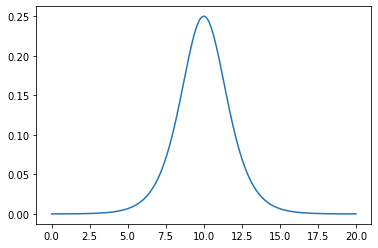

In [76]:
# Kode for å lage plot av farten for hvert tidspunkt her
dt = 0.01

måletidspunkt = arange(0, 20+dt, dt)
måledistanser = f(måletidspunkt)

antall_tidspunkt = len(måledistanser)

fart = zeros(antall_tidspunkt-1)
for t in range(antall_tidspunkt - 1):
    fart[t] = (måledistanser[t+1] - måledistanser[t]) / dt
    
plot(måletidspunkt[1:], fart)
show()

### Oppgave 3b)
Modifiser verdien for `dt` i cellen over. Hva skjer når du gjør `dt` stor, veldig liten og lik 0?

In [77]:
def plot_deriverte(dt=1):
    måletidspunkt = arange(0, 21, dt)
    måledistanser = f(måletidspunkt)
    antall_tidssteg = len(måletidspunkt)
    
    endring_distanse = zeros(antall_tidssteg - 1)
    for i in range(antall_tidssteg - 1):
        endring_distanse[i] = måledistanser[i+1] - måledistanser[i] 
    fart = endring_distanse/dt
    
    plot(måletidspunkt[1:], fart) # hvorfor hopper vi over første tidspunkt?


    title('Løpetur')
    xlabel('Tid')
    ylabel('Fart')
    show()

interact(plot_deriverte, dt=(0.0, 2.0))

interactive(children=(FloatSlider(value=1.0, description='dt', max=2.0), Output()), _dom_classes=('widget-inte…

<function __main__.plot_deriverte(dt=1)>

### Oppgave 3c)
Modifiser koden under slik at, `deriver(avstandsmålinger, dt)` tar inn en array av avstandsmålinger og hvort stort tidsinterval som er mellom hver måling og returnerer en array med den tilhørende farten.

In [78]:
def deriver(avstandsmålinger, dt):
    """Ta inn array av avstandsmålinger og dt og returner tilhørende fart.
    """
    antall_målinger = len(avstandsmålinger)
    fart = zeros(antall_målinger-1)
    
    # Kode for å lagre den deriverte til avstandsmålinger i fart-variabelen her
    for t in range(antall_målinger - 1):
        fart[t] = (avstandsmålinger[t+1] - avstandsmålinger[t]) / dt
        
    return fart

### Oppgave 3d)

Nå kan vi bruke funksjonen til å derivere hvilken som helst funksjon, så lenge vi har en array med målinger. Cellen under lager først et plot av $g(x) = cos(x) + x$ for $x = 0 - 10$. Så deriveres funksjonen og plotter den deriverte under i et eget plot. Modifiser koden slik at den deriverer funksjonen $ h(x) = (sin(x) + 1)^x $ istedenfor $g(x)$.

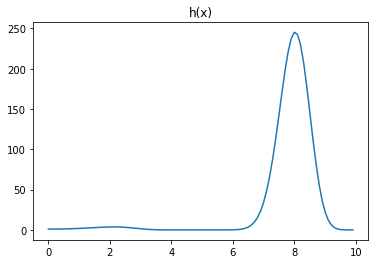

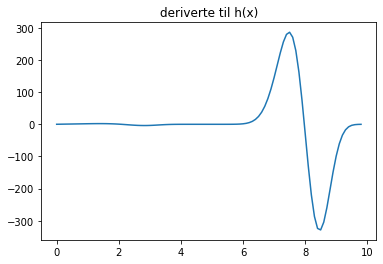

In [79]:
# Definere funksjonen som skal deriveres
def g(x):
    return cos(x)+x 

def h(x):
    return (sin(x) + 1)**x

# Definere størrelsen på tidsintervallet (dt)
dt = 0.1

# Lage arrayer med 'måletidspunkt' og 'målinger'
x_verdier = arange(0, 10, dt)
y_verdier = h(x_verdier)

# Tegne plot av funksjonen
plot(x_verdier, y_verdier)
title('h(x)')
show()

# Bruke numerisk derivasjon til å derivere funksjonen
fart_verdier = deriver(y_verdier, dt)

# Tegne plot av den deriverte
plot(x_verdier[:-1], fart_verdier)
title('deriverte til h(x)')
show()

# Del 3:  Numerisk derivasjon av ekte data

Vi laster inn en tekstfil med tidpunkt og avstander målt i seksunder og km henholdsvis, ved å bruke `loadtxt`-funksjonen i `pylab`.

In [80]:
tidspunkt_s, avstander_km = loadtxt("data.txt")

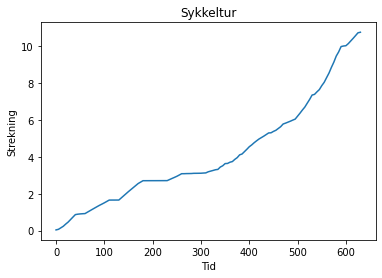

In [81]:
plot(tidspunkt_s, avstander_km)
xlabel('Tid')
ylabel('Strekning')
title('Sykkeltur')
show()

Koden under kan du bruke for å regne ut hastigheten til denne sykkelturen.

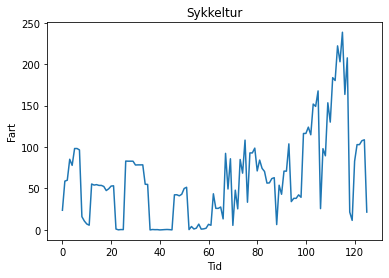

In [82]:
dt_s = 5 # Fem sekund mellom hver måling
fart = deriver(avstander_km, dt_s) #km/s
fart = fart*3600 # km/h
tidspunkt_s = arange(0, fart.shape[0]*dt_s, dt_s )
plot(fart)

xlabel('Tid')
ylabel('Fart')
title('Sykkeltur')
show()